In [1]:
import pandas as pd
import mplfinance as mpf

In [2]:
df = pd.read_csv('NIFTY 50 - 1 Day data 2015 to Aug 2024 GO CORONA.csv')
df_5 = pd.read_csv('NIFTY 50 - 5m data 2015 to Aug 2024.csv')

In [3]:
df_2024 = df[(df['year']==2024)]
df_5_2024 = df_5[(df_5['year']==2024)]
df_2024['source']='B'
df_5_2024['source']='A'

/tmp/ipykernel_8969/191917441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['source']='B'
/tmp/ipykernel_8969/191917441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_2024['source']='A'


In [4]:
df.head(15)

,Unnamed: 0,high,low,open,close,year,month,day,close_open_diff
0,2015-01-09,8303.00,8191.10,8285.45,8280.25,2015,1,9,-11.10
1,2015-01-12,8332.25,8245.60,8291.35,8326.55,2015,1,12,-19.60
2,2015-01-13,8356.65,8268.15,8346.15,8303.80,2015,1,13,-3.45
3,2015-01-14,8326.30,8236.75,8307.25,8287.75,2015,1,14,-137.45
4,2015-01-15,8526.90,8380.75,8425.20,8461.15,2015,1,15,-92.25
5,2015-01-19,8570.80,8531.70,8553.40,8550.30,2015,1,19,-24.80
6,2015-01-20,8707.75,8574.65,8575.10,8691.25,2015,1,20,-28.40
7,2015-01-21,8741.50,8689.70,8719.65,8728.05,2015,1,21,-17.80
8,2015-01-22,8774.00,8727.15,8745.85,8762.20,2015,1,22,-65.75
9,2015-01-23,8866.15,8795.60,8827.95,8823.55,2015,1,23,-47.80


<Axes: title={'center': 'Distribution Without Outliers'}, ylabel='Frequency'>

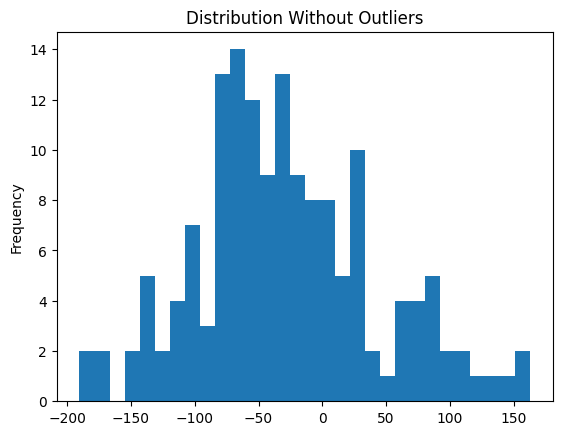

In [5]:
# Define a function to remove outliers based on IQR method
def remove_outliers_iqr(manav, column):
    Q1 = manav[column].quantile(0.25)
    Q3 = manav[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows where the column value is within the bounds
    filtered_manav = manav[(manav[column] >= lower_bound) & (manav[column] <= upper_bound)]
    return filtered_manav

# Remove outliers from 'high_open_difference' column
df_filtered = remove_outliers_iqr(df_2024, 'close_open_diff')

# Plot the distribution of the filtered data
df_filtered['close_open_diff'].plot(kind='hist', bins=30, title="Distribution Without Outliers")


In [6]:
# Filter the DataFrame to exclude values between -10 and 10
df_filtered = df_filtered[(df_filtered['close_open_diff'] < -20) | (df_filtered['close_open_diff'] > 20)]

In [7]:
merged_df = pd.concat([df_5_2024, df_filtered])

merged_df = merged_df.sort_values(by=['month','day', 'source'], ascending=[True,True, True])

merged_df

,Unnamed: 0,high,low,open,close,year,month,day,hour,minute,source,close_open_diff
2221,2024-01-01,21737.35,21693.55,21727.75,21693.75,2024,1,1,9.0,15.0,A,NaN
1476,2024-01-01,21834.35,21680.85,21727.75,21689.45,2024,1,1,NaN,NaN,B,-61.90
2222,2024-01-02,21755.60,21699.15,21751.35,21722.95,2024,1,2,9.0,15.0,A,NaN
2223,2024-01-03,21677.00,21594.45,21661.10,21617.05,2024,1,3,9.0,15.0,A,NaN
1478,2024-01-03,21677.00,21500.35,21661.10,21523.70,2024,1,3,NaN,NaN,B,-82.10
...,...,...,...,...,...,...,...,...,...,...,...,...
1636,2024-08-23,24858.40,24771.65,24845.40,24831.85,2024,8,23,NaN,NaN,B,-74.25
2382,2024-08-26,24917.30,24874.70,24906.10,24887.45,2024,8,26,9.0,15.0,A,NaN
2383,2024-08-27,25037.70,24988.00,25024.80,25021.45,2024,8,27,9.0,15.0,A,NaN
1638,2024-08-27,25073.10,24973.65,25024.80,24997.05,2024,8,27,NaN,NaN,B,-33.75


In [8]:
value_counts = merged_df['Unnamed: 0'].value_counts()

# Filter the dataframe to keep only the values that occur more than once
merged_df = merged_df[merged_df['Unnamed: 0'].isin(value_counts[value_counts > 1].index)]

In [9]:
merged_df = merged_df.iloc[1:,:]

In [10]:
import os

<Axes: title={'center': 'Distribution Without Outliers'}, ylabel='Frequency'>

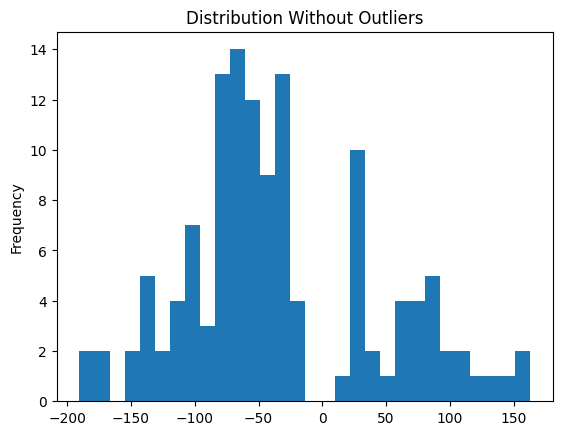

In [11]:
df_filtered['close_open_diff'].plot(kind='hist', bins=30, title="Distribution Without Outliers")

In [12]:
# Create a list to store the grouped results
august_dfs = []

for _, group in merged_df.groupby('month'):
    # Iterate over the dates, excluding the last one
    unique_days = group['day'].unique()
    for i in range(len(unique_days)-1):
        current_day_data = group[(group['day'] == unique_days[i])&(group['source']=='B')]
        next_day_data = group[(group['day'] == unique_days[i + 1])&(group['source']=='A')]
            
        # Concatenate current day's data with next day's data
        combined_data = pd.concat([current_day_data, next_day_data])
            
        if not combined_data.empty:
        # Append to the grouped list
            august_dfs.append(combined_data)

In [15]:
for august_df in august_dfs:
# Plot candlestick chart
    hari = august_df[august_df['source']=='B']
    year = hari['year'].unique()[0]
    month = hari['month'].unique()[0]
    close_open_diff = hari['close_open_diff'].unique()[0]
    directory_path = f"{os.getcwd()}/diff_vs_first_candle/{year}_{month}"
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
    krushna = august_df[august_df['source']=='A']
    ohlc = krushna[['open','high','low','close']]
    ohlc.index = pd.to_datetime(krushna['Unnamed: 0'])
    day = krushna['day'].unique()[0]

    mpf.plot(ohlc, type='candle', style='charles', title=f'GAP: {close_open_diff}', ylabel='Price', savefig=os.path.join(directory_path,str(day)))